In [1]:
# To support both python 2 and python 3
# 让这份笔记同步支持 python 2 和 python 3
from __future__ import division
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

**6. A researcher collects expression measurements for 1,000 genes in 100
tissue samples. The data can be written as a 1,000 × 100 matrix....................
(c) Design and run a small simulation experiment to demonstrate
the superiority of your idea.**

**a)首先模拟一个T样本和C样本除去两台机器影响无差异的数据**

In [2]:
np.random.seed(2012)
X = np.random.normal(0,1,(100,1000)) 

In [3]:
from sklearn.model_selection import train_test_split
from scipy import stats
X_C, X_T = train_test_split(X, test_size=0.5, random_state=2012)
t_result = stats.ttest_rel(X_C, X_T)
(t_result.pvalue < 0.05).sum()

56

**原始模拟数据1000个基因中存在56个拒绝原假设，认为rvs1 与 rvs2 所代表的总均值不相等**

In [4]:
#引入时间性的机器影响
for i in range(100):
    X[i] = X[i] + 0.011 * i

In [5]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
X_Standard = scale(X)
pca = PCA()
pca.fit(X_Standard)
pca.explained_variance_ratio_[0]

0.09996053882855029

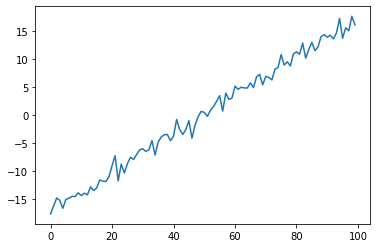

In [6]:
#第一主成分的线性
plt.plot(pca.transform(X_Standard)[:,0])
plt.show()

**方案一：直接将数据进行T校验比较**

In [7]:
X_C, X_T = train_test_split(X_Standard, test_size=0.5, random_state=2012)
t_result = stats.ttest_rel(X_C, X_T)
(t_result.pvalue < 0.05).sum()

51

1000个基因中存在51个拒绝原假设，认为rvs1 与 rvs2 所代表的总均值不相等

**方案二：将数据去除第一主成分后进行T校验比较**

In [8]:
X_del1 = X_Standard - pca.transform(X_Standard)[:,0].reshape(100,1).dot(pca.components_[0].reshape(1,1000))
X_C, X_T = train_test_split(X_del1, test_size=0.5, random_state=2012)
t_result = stats.ttest_rel(X_C, X_T)
(t_result.pvalue < 0.05).sum()

52

1000个基因中存在52个拒绝原假设，认为rvs1 与 rvs2 所代表的总均值不相等,无明显变化

**方案三：数据取去除第一主成分后的90%有效成分进行T校验比较**

In [9]:
(pca.explained_variance_ratio_.cumsum() < 0.9).sum()

80

In [10]:
#取2-80个主成分
X_del2= pca.transform(X_Standard)[:,1:80].reshape(100,79).dot(pca.components_[1:80].reshape(79,1000))
X_C, X_T = train_test_split(X_del2, test_size=0.5, random_state=2012)
t_result = stats.ttest_rel(X_C, X_T)
(t_result.pvalue < 0.05).sum()

52

1000个基因中存在52个拒绝原假设，认为rvs1 与 rvs2 所代表的总均值不相等,无明显变化

**b)再次模拟一个T样本和C样本除去两台机器影响外，存在较大差异的数据**

In [11]:
np.random.seed(2012)
X1 = np.random.normal(0,1,(50,1000)) ** 2
X2 = np.random.normal(0,1,(50,1000)) ** 3

In [12]:
t_result = stats.ttest_rel(X1, X2)
(t_result.pvalue < 0.05).sum()

495

**原始模拟数据1000个基因中存在495个拒绝原假设，认为rvs1 与 rvs2 所代表的总均值不相等**

In [13]:
#随机化引入时间性的机器影响
X = np.r_[X1,X2]
sampler = np.random.permutation(100)
X_sampler = X[sampler]
for i in range(100):
    X_sampler[i] = X_sampler[i] + 0.023*i

In [14]:
X_Standard = scale(X_sampler)
pca = PCA()
pca.fit(X_Standard)
pca.explained_variance_ratio_[0]

0.10111360716963327

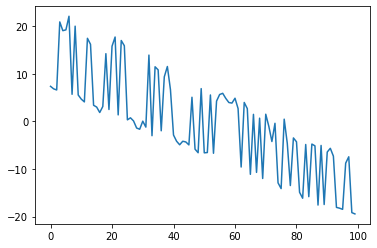

In [15]:
#第一主成分的线性
plt.plot(pca.transform(X_Standard)[:,0])
plt.show()

**方案一：直接将数据进行T校验比较**

In [16]:
ind = sampler * 1000
for i in range(1,1000):
    ind = np.c_[ind , sampler * 1000 + i]

In [17]:
X_orgin = X_Standard.copy()
X_orgin.put(ind,X_Standard)
X_C, X_T =X_orgin[:50], X_orgin[50:]
t_result = stats.ttest_rel(X_C, X_T)
#t_result = stats.ttest_ind(X_C, X_T)
(t_result.pvalue < 0.05).sum()

365

1000个基因中存在602个拒绝原假设，认为rvs1 与 rvs2 所代表的总均值不相等

**方案二：将数据去除第一主成分后进行T校验比较**

In [18]:
#X_del1 = X_Standard - pca.transform(X_Standard)[:,0].reshape(100,1).dot(pca.components_[0].reshape(1,1000))
X_del1.put(ind,X_Standard - pca.transform(X_Standard)[:,0].reshape(100,1).dot(pca.components_[0].reshape(1,1000)))
X_C, X_T = X_del1[:50], X_del1[50:]
t_result = stats.ttest_rel(X_C, X_T)
#t_result = stats.ttest_ind(X_C, X_T)
(t_result.pvalue < 0.05).sum()

12

**方案三：数据取去除第一主成分后的90%有效成分进行T校验比较**

In [19]:
(pca.explained_variance_ratio_.cumsum() < 0.9).sum()

59

In [20]:
#X_del2 = pca.transform(X_Standard)[:,1:59].reshape(100,58).dot(pca.components_[1:59].reshape(58,1000))
X_del2.put(ind,pca.transform(X_Standard)[:,1:59].reshape(100,58).dot(pca.components_[1:59].reshape(58,1000)))
X_C, X_T = X_del2[:50], X_del2[50:]
t_result = stats.ttest_rel(X_C, X_T)
#t_result = stats.ttest_ind(X_C, X_T)
(t_result.pvalue < 0.05).sum()

27

**综上实验可以看出，保留第一主成分情况下，反而最接近原始数据结果**